In [0]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split


In [0]:
with open('train_image.pkl','rb') as file:
    train_image = pickle.load(file)
    train_image = np.array(train_image)
    file.close()

with open('train_label.pkl','rb') as file:
    train_label = pickle.load(file)
    train_label = np.array(train_label)
    file.close()

In [7]:
train_image.shape, train_label.shape

((8000, 784), (8000,))

In [0]:
classes = np.unique(train_label)
IMG_SIZE = 28
def prepareData(images, labels):
    Y = []
    X = (np.array(images).reshape(-1,IMG_SIZE,IMG_SIZE,1))/255
    for l in labels:
        Y.append([int(classes[i]==l) for i in range(4)])
    return X,np.array(Y)

X,Y = prepareData(train_image, train_label)

In [9]:
X.shape, Y.shape

((8000, 28, 28, 1), (8000, 4))

# Visualising

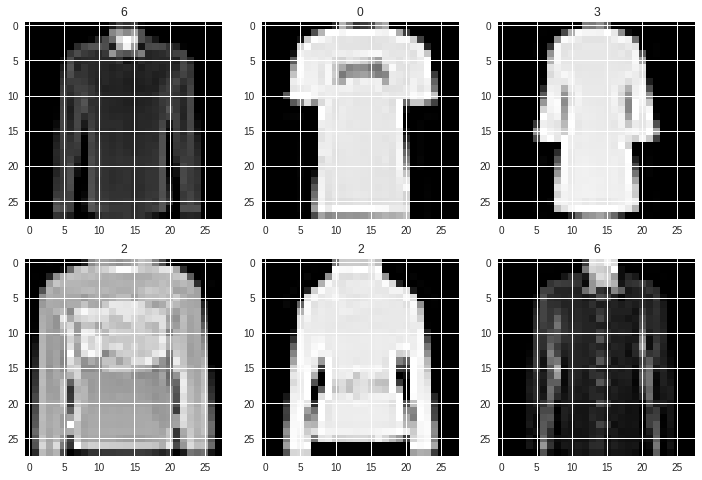

In [10]:
fig = plt.figure(figsize=(12, 8))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    rnd = np.random.randint(0,8000)
    img,lbl = X[rnd].reshape(IMG_SIZE,IMG_SIZE),Y[rnd]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
    plt.title(classes[np.argmax(lbl)])
plt.show()

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.20,random_state=0)


In [0]:
def plotHistory(history):
    # summarize history for accuracy
    fig = plt.figure(figsize=(10,5))

    fig.add_subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')


    # summarize history for loss
    fig.add_subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')


    plt.show()

In [0]:
# MODEL ARCHITECTURE

clf1 = keras.models.Sequential()

clf1.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
clf1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

clf1.add(keras.layers.Flatten())

clf1.add(keras.layers.Dense(units=128,activation='relu'))
clf1.add(keras.layers.Dense(units=4,activation='softmax'))


clf1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
clf1.summary()

In [0]:
history1 = clf1.fit(xtrain,ytrain,epochs=50,batch_size=128,validation_split=0.1)

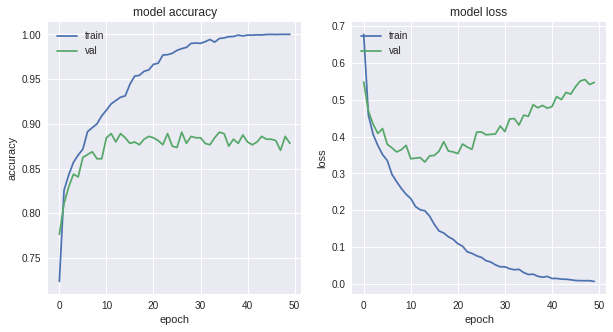

1600/1600 [==============================] - 0s 75us/sample - loss: 0.7437 - acc: 0.8681
Test Accuracy:  0.868125


In [34]:
plotHistory(history1)
testLoss1, testAccuracy1 = clf1.evaluate(xtest,ytest)
print("Test Accuracy: ", testAccuracy1)

In [36]:
#model2 with dropouts

clf = keras.models.Sequential()

clf.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
clf.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

clf.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
clf.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
clf.add(keras.layers.Dropout(0.5))


clf.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
clf.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
clf.add(keras.layers.Dropout(0.5))

clf.add(keras.layers.Flatten())
clf.add(keras.layers.Dense(units=1024,activation='relu'))
clf.add(keras.layers.Dropout(0.5))
clf.add(keras.layers.Dense(units=512,activation='relu'))
clf.add(keras.layers.Dropout(0.5))
clf.add(keras.layers.Dense(units=4,activation='softmax'))


clf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 3, 3, 256)         0         
__________

In [0]:
history2 = clf.fit(xtrain,ytrain,epochs=50,batch_size=128,validation_split=0.1)

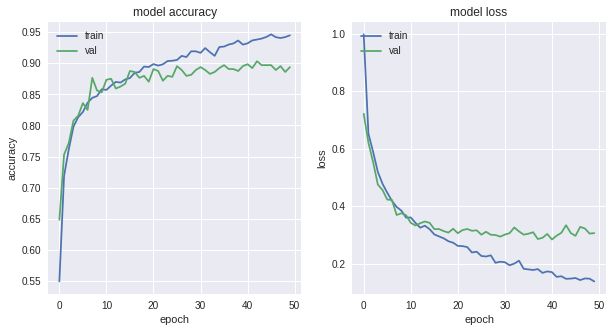

1600/1600 [==============================] - 0s 184us/sample - loss: 0.3689 - acc: 0.8781
Test Accuracy:  0.878125


In [33]:
plotHistory(history2)
testLoss2, testAccuracy2 = clf.evaluate(xtest,ytest)
print("Test Accuracy: ", testAccuracy2)

Lets try another model with batch normalisation.

In [45]:
#model2 with dropouts

clf3 = keras.models.Sequential()

clf3.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
clf3.add(keras.layers.BatchNormalization())

clf3.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
clf3.add(keras.layers.BatchNormalization())
clf3.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
clf3.add(keras.layers.Dropout(0.5))


clf3.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
clf3.add(keras.layers.BatchNormalization())
clf3.add(keras.layers.Dropout(0.5))
    
clf3.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
clf3.add(keras.layers.BatchNormalization())
clf3.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
clf3.add(keras.layers.Dropout(0.5))

clf3.add(keras.layers.Flatten())

clf3.add(keras.layers.Dense(units=512,activation='relu'))
clf3.add(keras.layers.BatchNormalization())
clf3.add(keras.layers.Dropout(0.5))


clf3.add(keras.layers.Dense(units=64,activation='relu'))
clf3.add(keras.layers.BatchNormalization())
clf3.add(keras.layers.Dropout(0.5))

clf3.add(keras.layers.Dense(units=4,activation='softmax'))


clf3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
clf3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_v1_24 (B (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_v1_25 (B (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 64)        18496     
__________

In [46]:
history3 = clf3.fit(xtrain,ytrain,epochs=50,batch_size=128,validation_split=0.1)

Train on 5760 samples, validate on 640 samples
Epoch 1/50
5760/5760 [==============================] - 4s 636us/sample - loss: 1.1654 - acc: 0.5892 - val_loss: 1.5707 - val_acc: 0.2656
Epoch 2/50
5760/5760 [==============================] - 2s 362us/sample - loss: 0.7971 - acc: 0.6911 - val_loss: 1.8764 - val_acc: 0.2656
Epoch 3/50
5760/5760 [==============================] - 2s 366us/sample - loss: 0.6659 - acc: 0.7363 - val_loss: 1.6539 - val_acc: 0.2656
Epoch 4/50
5760/5760 [==============================] - 2s 361us/sample - loss: 0.6109 - acc: 0.7613 - val_loss: 1.2137 - val_acc: 0.4047
Epoch 5/50
5760/5760 [==============================] - 2s 359us/sample - loss: 0.5723 - acc: 0.7788 - val_loss: 1.0657 - val_acc: 0.5188
Epoch 6/50
5760/5760 [==============================] - 2s 356us/sample - loss: 0.4994 - acc: 0.8104 - val_loss: 1.1596 - val_acc: 0.4359
Epoch 7/50
5760/5760 [==============================] - 2s 367us/sample - loss: 0.4828 - acc: 0.8118 - val_loss: 1.1358 - val

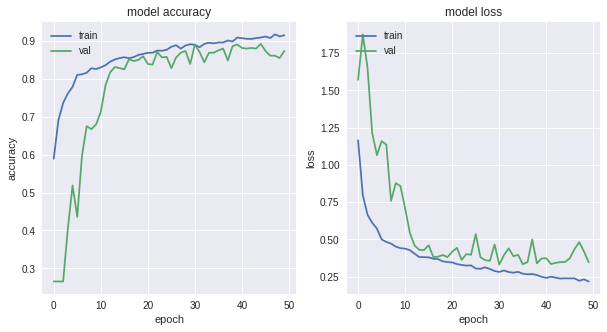

1600/1600 [==============================] - 0s 223us/sample - loss: 0.3570 - acc: 0.8825
Test Accuracy:  0.8825


In [47]:
plotHistory(history3)
testLoss3, testAccuracy3 = clf3.evaluate(xtest,ytest)
print("Test Accuracy: ", testAccuracy3)

Data Augmentation Stuff